In [16]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, LeaveOneOut, GridSearchCV, cross_val_score
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_missing_value, plot_classification_report, plot_correlation_matrix, plot_confusion_matrix
pd.options.display.max_columns = None

In [45]:
df  = pd.read_csv("Vanili_1Window.csv")
df.head()

,F1_max_w1,F2_max_w1,F3_max_w1,F4_max_w1,F5_max_w1,F6_max_w1,F7_max_w1,F8_max_w1,F9_max_w1,F10_max_w1,Temp_max_w1,Humid_max_w1,F1_median_w1,F2_median_w1,F3_median_w1,F4_median_w1,F5_median_w1,F6_median_w1,F7_median_w1,F8_median_w1,F9_median_w1,F10_median_w1,Temp_median_w1,Humid_median_w1,F1_slope_w1,F2_slope_w1,F3_slope_w1,F4_slope_w1,F5_slope_w1,F6_slope_w1,F7_slope_w1,F8_slope_w1,F9_slope_w1,F10_slope_w1,Temp_slope_w1,Humid_slope_w1,F1_mean_w1,F2_mean_w1,F3_mean_w1,F4_mean_w1,F5_mean_w1,F6_mean_w1,F7_mean_w1,F8_mean_w1,F9_mean_w1,F10_mean_w1,Temp_mean_w1,Humid_mean_w1,F1_std_w1,F2_std_w1,F3_std_w1,F4_std_w1,F5_std_w1,F6_std_w1,F7_std_w1,F8_std_w1,F9_std_w1,F10_std_w1,Temp_std_w1,Humid_std_w1,Category
0,3135.625,840.250,1412.125,3373.375,2785.000,3096.125,269.000,3840.750,3691.875,3794.500,36.03,45.32,2444.7500,775.0000,1410.000,3153.8750,2538.1875,2968.9375,261.8750,3630.8750,3329.9375,3614.8125,35.990,43.640,139.424625,10.226538,0.254193,213.763029,132.017934,84.706578,2.251628,305.891097,225.243219,259.691547,0.002797,0.410692,2478.89875,781.36750,1410.27125,2776.31375,2379.90625,2847.42875,260.32375,3020.37625,3007.54750,3127.59125,35.9926,43.5820,409.720444,30.318729,0.844818,671.761033,401.594150,261.069366,6.634632,979.842202,692.061257,852.321246,0.015016,1.206317,A
1,2620.875,810.625,1419.875,3093.000,2373.125,2856.750,240.500,3609.375,3340.125,3510.500,37.37,40.80,2151.9375,782.3125,1418.375,2619.4375,2138.0625,2708.2500,236.5625,2809.3125,2758.5625,3105.3125,37.335,39.915,76.563839,4.072705,0.226733,188.056878,74.350825,51.291412,1.076470,306.022915,174.567162,247.645890,0.006480,0.235155,2197.52125,785.59875,1418.54500,2449.43375,2101.43250,2674.34625,236.05875,2548.45875,2664.62250,2748.46750,37.3303,39.8638,226.541215,12.195525,0.683158,563.158631,219.435529,151.902614,3.151401,917.566360,515.352256,760.160160,0.023331,0.695288,A
2,2699.750,817.875,1420.375,3122.000,2399.375,2870.125,242.500,3645.875,3388.875,3542.500,37.40,40.21,2216.3125,787.8750,1419.125,2719.3750,2195.8750,2741.5000,238.6875,2986.0000,2837.3750,3203.3125,37.370,39.335,82.824205,4.385614,0.238096,187.610734,79.087039,53.702310,1.155333,297.332808,174.986161,242.702520,0.005492,0.219936,2257.62125,791.38750,1419.18875,2508.91625,2133.49500,2692.38750,237.93875,2660.43500,2728.43875,2824.84250,37.3663,39.2950,244.347473,13.118541,0.698911,566.521563,235.776811,160.680711,3.393840,898.345482,518.297356,753.296322,0.022947,0.649451,A
3,3110.750,859.000,1420.625,3361.500,2752.375,3078.375,248.625,3834.125,3683.125,3798.750,37.51,40.22,2395.3125,797.2500,1418.375,3073.5625,2476.1250,2915.1875,241.8750,3523.5625,3223.2500,3573.3125,37.470,39.320,137.812009,9.043152,0.334383,217.423440,124.453705,80.531953,1.831983,322.544989,216.285066,262.059398,0.008511,0.230722,2438.86875,804.23125,1418.61250,2723.76375,2351.75000,2825.22250,241.10500,2926.73750,2972.77625,3097.72625,37.4640,39.2651,404.947037,27.002007,0.994540,674.177850,373.921378,243.175371,5.364572,1015.609823,653.312138,848.335311,0.029233,0.680378,A
4,2706.375,822.875,1418.750,3141.000,2418.250,2881.250,243.750,3659.875,3416.875,3571.625,37.47,39.96,2198.9375,790.8750,1417.250,2725.0000,2176.3750,2738.1875,239.5000,2977.6250,2873.3125,3213.8125,37.435,39.190,85.810899,4.741682,0.207808,193.325293,80.836896,54.984691,1.149160,311.749302,179.098950,248.506068,0.007477,0.201413,2244.46375,794.35875,1417.43625,2509.04000,2130.80875,2694.05625,238.94250,2631.35625,2750.58000,2833.12625,37.4298,39.1430,253.297705,14.149172,0.652669,583.342691,239.269147,163.746155,3.364739,941.975590,530.677926,770.329466,0.025583,0.597519,A


In [46]:
df = df[['F1_max_w1','F2_max_w1','F3_max_w1','F4_max_w1','F5_max_w1','F6_max_w1','F7_max_w1','F8_max_w1','F9_max_w1','F10_max_w1',
           'F1_median_w1','F2_median_w1','F3_median_w1','F4_median_w1','F5_median_w1','F6_median_w1','F7_median_w1','F8_median_w1','F9_median_w1','F10_median_w1',
           'F1_slope_w1','F2_slope_w1','F3_slope_w1','F4_slope_w1','F5_slope_w1','F6_slope_w1','F7_slope_w1','F8_slope_w1','F9_slope_w1','F10_slope_w1',
           'F1_mean_w1','F2_mean_w1','F3_mean_w1','F4_mean_w1','F5_mean_w1','F6_mean_w1','F7_mean_w1','F8_mean_w1','F9_mean_w1','F10_mean_w1',
           'F1_std_w1','F2_std_w1','F3_std_w1','F4_std_w1','F5_std_w1','F6_std_w1','F7_std_w1','F8_std_w1','F9_std_w1','F10_std_w1',

           'Category']]
df.head()

,F1_max_w1,F2_max_w1,F3_max_w1,F4_max_w1,F5_max_w1,F6_max_w1,F7_max_w1,F8_max_w1,F9_max_w1,F10_max_w1,F1_median_w1,F2_median_w1,F3_median_w1,F4_median_w1,F5_median_w1,F6_median_w1,F7_median_w1,F8_median_w1,F9_median_w1,F10_median_w1,F1_slope_w1,F2_slope_w1,F3_slope_w1,F4_slope_w1,F5_slope_w1,F6_slope_w1,F7_slope_w1,F8_slope_w1,F9_slope_w1,F10_slope_w1,F1_mean_w1,F2_mean_w1,F3_mean_w1,F4_mean_w1,F5_mean_w1,F6_mean_w1,F7_mean_w1,F8_mean_w1,F9_mean_w1,F10_mean_w1,F1_std_w1,F2_std_w1,F3_std_w1,F4_std_w1,F5_std_w1,F6_std_w1,F7_std_w1,F8_std_w1,F9_std_w1,F10_std_w1,Category
0,3135.625,840.250,1412.125,3373.375,2785.000,3096.125,269.000,3840.750,3691.875,3794.500,2444.7500,775.0000,1410.000,3153.8750,2538.1875,2968.9375,261.8750,3630.8750,3329.9375,3614.8125,139.424625,10.226538,0.254193,213.763029,132.017934,84.706578,2.251628,305.891097,225.243219,259.691547,2478.89875,781.36750,1410.27125,2776.31375,2379.90625,2847.42875,260.32375,3020.37625,3007.54750,3127.59125,409.720444,30.318729,0.844818,671.761033,401.594150,261.069366,6.634632,979.842202,692.061257,852.321246,A
1,2620.875,810.625,1419.875,3093.000,2373.125,2856.750,240.500,3609.375,3340.125,3510.500,2151.9375,782.3125,1418.375,2619.4375,2138.0625,2708.2500,236.5625,2809.3125,2758.5625,3105.3125,76.563839,4.072705,0.226733,188.056878,74.350825,51.291412,1.076470,306.022915,174.567162,247.645890,2197.52125,785.59875,1418.54500,2449.43375,2101.43250,2674.34625,236.05875,2548.45875,2664.62250,2748.46750,226.541215,12.195525,0.683158,563.158631,219.435529,151.902614,3.151401,917.566360,515.352256,760.160160,A
2,2699.750,817.875,1420.375,3122.000,2399.375,2870.125,242.500,3645.875,3388.875,3542.500,2216.3125,787.8750,1419.125,2719.3750,2195.8750,2741.5000,238.6875,2986.0000,2837.3750,3203.3125,82.824205,4.385614,0.238096,187.610734,79.087039,53.702310,1.155333,297.332808,174.986161,242.702520,2257.62125,791.38750,1419.18875,2508.91625,2133.49500,2692.38750,237.93875,2660.43500,2728.43875,2824.84250,244.347473,13.118541,0.698911,566.521563,235.776811,160.680711,3.393840,898.345482,518.297356,753.296322,A
3,3110.750,859.000,1420.625,3361.500,2752.375,3078.375,248.625,3834.125,3683.125,3798.750,2395.3125,797.2500,1418.375,3073.5625,2476.1250,2915.1875,241.8750,3523.5625,3223.2500,3573.3125,137.812009,9.043152,0.334383,217.423440,124.453705,80.531953,1.831983,322.544989,216.285066,262.059398,2438.86875,804.23125,1418.61250,2723.76375,2351.75000,2825.22250,241.10500,2926.73750,2972.77625,3097.72625,404.947037,27.002007,0.994540,674.177850,373.921378,243.175371,5.364572,1015.609823,653.312138,848.335311,A
4,2706.375,822.875,1418.750,3141.000,2418.250,2881.250,243.750,3659.875,3416.875,3571.625,2198.9375,790.8750,1417.250,2725.0000,2176.3750,2738.1875,239.5000,2977.6250,2873.3125,3213.8125,85.810899,4.741682,0.207808,193.325293,80.836896,54.984691,1.149160,311.749302,179.098950,248.506068,2244.46375,794.35875,1417.43625,2509.04000,2130.80875,2694.05625,238.94250,2631.35625,2750.58000,2833.12625,253.297705,14.149172,0.652669,583.342691,239.269147,163.746155,3.364739,941.975590,530.677926,770.329466,A


## Normalization & Data Splitting

In [47]:
X = df.drop(columns="Category")
y = df.Category
#le = LabelEncoder()
#le.fit(["A", "B"])
#y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56, 50), (14, 50), (56,), (14,))

In [14]:
X_train.head()

,F1_max_w1,F2_max_w1,F3_max_w1,F4_max_w1,F5_max_w1,F6_max_w1,F7_max_w1,F8_max_w1,F9_max_w1,F10_max_w1,F1_median_w1,F2_median_w1,F3_median_w1,F4_median_w1,F5_median_w1,F6_median_w1,F7_median_w1,F8_median_w1,F9_median_w1,F10_median_w1,F1_slope_w1,F2_slope_w1,F3_slope_w1,F4_slope_w1,F5_slope_w1,F6_slope_w1,F7_slope_w1,F8_slope_w1,F9_slope_w1,F10_slope_w1,F1_mean_w1,F2_mean_w1,F3_mean_w1,F4_mean_w1,F5_mean_w1,F6_mean_w1,F7_mean_w1,F8_mean_w1,F9_mean_w1,F10_mean_w1,F1_std_w1,F2_std_w1,F3_std_w1,F4_std_w1,F5_std_w1,F6_std_w1,F7_std_w1,F8_std_w1,F9_std_w1,F10_std_w1
21,3218.875,925.250,1448.375,3286.250,2612.125,2987.875,260.375,3784.250,3651.250,3738.375,2975.9375,853.6250,1446.1250,3186.1875,2459.4375,2904.0000,258.0625,3723.0625,3602.6875,3664.8125,76.672967,8.347918,0.263784,64.579052,28.119978,17.880967,0.886407,111.094108,75.963581,82.030971,2769.608750,852.141875,1446.045625,2937.871250,2365.246875,2841.781875,255.264375,3274.188125,3291.541250,3349.771875,469.007153,48.612194,1.544827,529.411146,264.650727,167.466701,5.671191,860.189613,546.811183,681.506533
45,3252.000,918.625,1424.125,3317.625,2673.750,3041.625,247.375,3807.500,3655.625,3755.625,3033.3125,843.2500,1421.5000,3218.6250,2512.8750,2952.3750,244.8750,3749.2500,3605.6875,3685.1875,77.632931,8.850318,0.352123,64.607746,28.498717,19.160004,0.877759,100.978009,76.401421,77.925957,2807.495000,841.480625,1421.272500,2967.710000,2412.961250,2883.576875,242.429375,3345.273750,3295.607500,3385.969375,478.965715,51.538810,2.059372,535.501280,282.449500,184.909286,5.562326,805.496468,558.298214,661.518034
62,3500.875,1078.375,1498.375,3504.375,3035.000,3250.750,296.000,3907.375,3825.000,3914.625,3402.3125,933.1875,1495.5000,3436.2500,2884.2500,3156.4375,290.3750,3872.8125,3789.8125,3875.6250,81.142165,16.535586,0.382388,62.545860,39.387806,23.006272,1.630482,89.835089,68.109729,70.219410,3081.289375,931.190625,1495.247500,3194.947500,2738.835625,3071.137500,286.303125,3522.615625,3521.811875,3609.186250,529.033326,96.156047,2.237120,545.629147,370.990823,227.211105,10.089482,781.494241,544.265603,648.332651
2,3007.875,863.625,1422.250,3126.250,2399.375,2870.250,244.125,3666.625,3466.375,3550.500,2703.5625,818.1875,1420.4375,3029.7500,2290.0625,2810.4375,242.5000,3602.3125,3390.8750,3471.4375,63.609366,5.094670,0.225217,62.954404,20.342967,15.107863,0.590594,109.567142,76.283397,79.529466,2588.683750,817.871875,1420.349375,2787.365625,2221.926250,2758.286875,240.800625,3149.990000,3088.961875,3164.852500,379.130408,29.664779,1.312884,488.910827,194.043297,133.462619,3.748850,801.690304,514.225004,632.016139
61,3466.375,1045.625,1500.625,3480.125,2987.125,3208.750,280.375,3895.375,3807.500,3899.250,3357.7500,920.8125,1498.4375,3403.0000,2819.1250,3106.1250,277.1250,3854.3125,3766.5000,3851.1875,79.601376,14.671655,0.332998,60.245050,35.891999,21.774508,0.997842,89.911598,67.819546,69.275412,3048.685000,917.786250,1498.165625,3169.245000,2685.847500,3025.706875,274.441250,3502.138125,3499.916875,3587.725625,515.647360,85.379860,1.960185,522.635328,354.892905,220.530625,6.203304,772.546252,535.758593,636.619301


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-1.89868662e-01, -3.10281851e-01,  1.78437603e-01, ...,
         1.55327778e+00,  2.25276513e-01,  1.27652804e+00],
       [-1.89995326e-03, -3.97821446e-01, -8.14161534e-01, ...,
        -2.31363056e-01,  4.68979008e-01,  3.13994767e-01],
       [ 1.41034797e+00,  1.71303897e+00,  2.22503376e+00, ...,
        -1.01455728e+00,  1.71270897e-01, -3.20938877e-01],
       ...,
       [ 6.04565126e-01,  2.87630096e-01,  6.44038229e-01, ...,
         7.62843285e-01,  7.22367125e-01,  1.04778469e+00],
       [-8.40311326e-01, -8.83418442e-01, -8.70442929e-01, ...,
        -1.60081259e+00, -7.25875669e-01, -1.37884159e+00],
       [ 1.27983385e+00,  1.20762168e+00, -1.31046110e+00, ...,
        -4.79568886e-01,  1.15755417e+00,  4.25523860e-01]])

## Model Sederhana

In [7]:
clf =  SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
model = SVC()
model.fit(X_train, y_train)
print('Training', model.score(X_train, y_train))
pred = model.predict(X_train)
cm = confusion_matrix(y_train,pred)
print(cm)
#Testing
model = SVC()
model.fit(X_train, y_train)
print('Testing', model.score(X_test, y_test))
pred = model.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)

Training 0.8214285714285714
[[23  5]
 [ 5 23]]
Testing 0.8571428571428571
[[5 2]
 [0 7]]


In [9]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print('Training', model.score(X_train, y_train))
pred = model.predict(X_train)
cm = confusion_matrix(y_train,pred)
print(cm)
#Testing
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print('Testing', model.score(X_test, y_test))
pred = model.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)

Training 0.875
[[24  4]
 [ 3 25]]
Testing 0.8571428571428571
[[5 2]
 [0 7]]


## Pipeline

In [48]:
numpip = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('numerik', numpip, X_train.columns)
])

## Grid Search CV

In [49]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(kernel='linear'))
])
cv = LeaveOneOut()
cv2 = RepeatedKFold(n_splits=10, n_repeats=10)

adjie_svmparams = [{'algo__kernel': ["linear"],
                    "algo__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                  {'algo__kernel': ["rbf"],
                   "algo__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'algo__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 100]}]

linear = [{'algo__kernel': ["linear"],"algo__C": [0.001, 0.01, 0.1, 1, 10, 100, 100]}]
radial = [{'algo__kernel': ["rbf"],
           "algo__C": [0.001, 0.01, 0.1, 1, 10, 100, 100],
          "algo__gamma": [0.001, 0.01, 0.1, 1, 10, 100, 100]}]

model_svmgscv = GridSearchCV(estimator=pipeline, param_grid=linear, cv=cv, verbose=1, n_jobs=-1)
model_svmgscv.fit(X_train, y_train)
print(model_svmgscv.best_params_)

Fitting 56 folds for each of 7 candidates, totalling 392 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s


{'algo__C': 1, 'algo__kernel': 'linear'}


[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 392 out of 392 | elapsed:    3.4s finished


In [41]:
model_svmgscv.score(X_train, y_train), model_svmgscv.best_score_, model_svmgscv.score(X_test, y_test)

(1.0, 0.8035714285714286, 0.8571428571428571)

In [42]:
pd.DataFrame(model_svmgscv.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__C,param_algo__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,split40_test_score,split41_test_score,split42_test_score,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,split50_test_score,split51_test_score,split52_test_score,split53_test_score,split54_test_score,split55_test_score,mean_test_score,std_test_score,rank_test_score
5,0.022141,0.003976,0.006716,0.002703,100,linear,"{'algo__C': 100, 'algo__kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.803571,0.397296,1
6,0.021750,0.004314,0.006251,0.001725,100,linear,"{'algo__C': 100, 'algo__kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.803571,0.397296,1
3,0.014713,0.002644,0.006484,0.001255,1,linear,"{'algo__C': 1, 'algo__kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.785714,0.410326,3
2,0.015713,0.004432,0.007289,0.002676,0.1,linear,"{'algo__C': 0.1, 'algo__kernel': 'linear'}",1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.750000,0.433013,4
1,0.014198,0.003797,0.006321,0.001722,0.01,linear,"{'algo__C': 0.01, 'algo__kernel': 'linear'}",1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.732143,0.442843,5
4,0.016785,0.002821,0.006698,0.001463,10,linear,"{'algo__C': 10, 'algo__kernel': 'linear'}",0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.732143,0.442843,5
0,0.015019,0.003510,0.006930,0.002328,0.001,linear,"{'algo__C': 0.001, 'algo__kernel': 'linear'}",1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.714286,0.451754,7


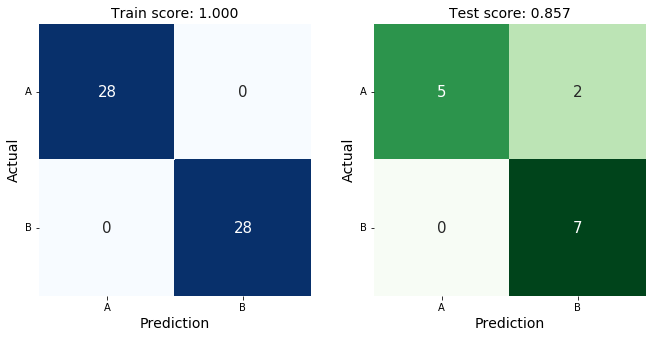

In [49]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model_svmgscv)

In [45]:
plot_classification_report(X_train, y_train, X_test, y_test, model_svmgscv, report=True)

Train report
              precision    recall  f1-score   support

           A       1.00      0.96      0.98        28
           B       0.97      1.00      0.98        28

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56


Test report
              precision    recall  f1-score   support

           A       1.00      0.57      0.73         7
           B       0.70      1.00      0.82         7

    accuracy                           0.79        14
   macro avg       0.85      0.79      0.78        14
weighted avg       0.85      0.79      0.78        14



In [43]:
#A
TPRtrain = 27/28
TNRtrain = 26/28
TPRtest = 6/7
TNRtest = 7/7

In [121]:
print(TPRtrain, TPRtest, TNRtrain, TNRtest)

0.9642857142857143 0.8571428571428571 0.9285714285714286 1.0


In [122]:
#B
TPRtrain = 26/28
TNRtrain = 27/28
TPRtest = 7/7
TNRtest = 6/7

In [123]:
print(TPRtrain, TPRtest, TNRtrain, TNRtest)

0.9285714285714286 1.0 0.9642857142857143 0.8571428571428571


In [92]:
X = df.drop(columns="Category")
y = df.Category

In [94]:
numpip = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('numerik', numpip, X.columns)
])

In [96]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC())
])
cv = LeaveOneOut()
cv2 = RepeatedKFold(n_splits=10, n_repeats=10)

adjie_svmparams = [{'algo__kernel': ["linear"],
                    "algo__C": [0.001, 0.01, 0.1, 1, 10, 100, 100]},
                  {'algo__kernel': ["rbf"],
                   "algo__C": [0.001, 0.01, 0.1, 1, 10, 100, 100],
                  'algo__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 100]}]

linear = [{'algo__kernel': ["linear"],"algo__C": [0.001, 0.01, 0.1, 1, 10, 100, 100]}]
radial = [{'algo__kernel': ["rbf"],
           "algo__C": [0.001, 0.01, 0.1, 1, 10, 100, 100],
          "algo__gamma": [0.001, 0.01, 0.1, 1, 10, 100, 100]}]

model_svmgscv = GridSearchCV(estimator=pipeline, param_grid=radial, cv=cv, verbose=1, n_jobs=-1)
model_svmgscv.fit(X, y)
print(model_svmgscv.best_params_)

Fitting 70 folds for each of 49 candidates, totalling 3430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   24.6s


{'algo__C': 100, 'algo__gamma': 0.001, 'algo__kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 3430 out of 3430 | elapsed:   33.8s finished


In [97]:
model_svmgscv.score(X, y), model_svmgscv.best_score_

(0.8571428571428571, 0.8142857142857143)

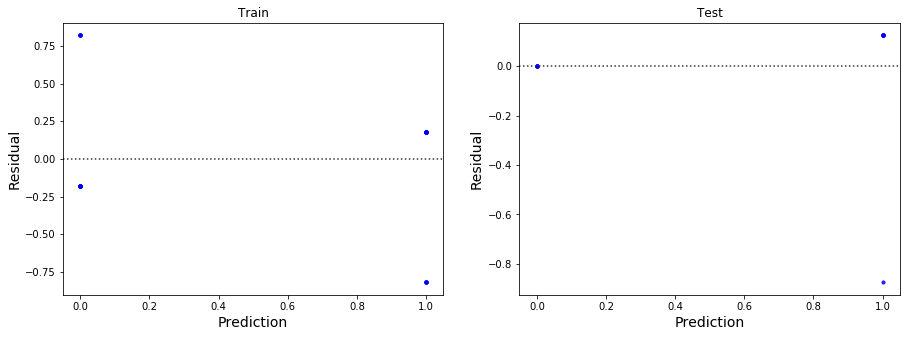

In [116]:
from jcopml.plot import plot_residual
plot_residual(X_train, y_train, X_test, y_test, model_svmgscv, lowess=False)

# Feature Importance

In [50]:
from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease

,feature,importance,stdev
11,F2_median_w1,1.714286e-01,0.046015
31,F2_mean_w1,1.285714e-01,0.028571
17,F8_median_w1,5.357143e-02,0.022588
6,F7_max_w1,4.642857e-02,0.026726
21,F2_slope_w1,4.285714e-02,0.014286
28,F9_slope_w1,3.928571e-02,0.020825
41,F2_std_w1,3.928571e-02,0.030723
16,F7_median_w1,2.857143e-02,0.018211
8,F9_max_w1,2.857143e-02,0.024223
20,F1_slope_w1,2.500000e-02,0.008748


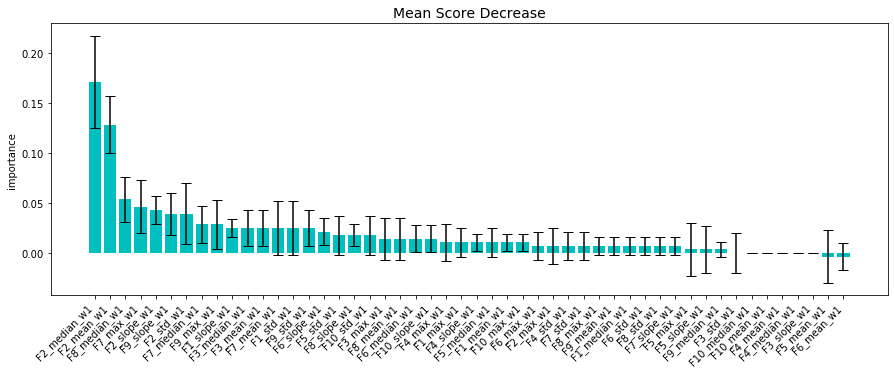

In [51]:
mean_score_decrease(X_train, y_train, model_svmgscv,plot=True, random_state=42)

In [11]:
a = mean_score_decrease(X_train, y_train, model_svmgscv, random_state=42)
a 

,feature,importance,stdev
31,F2_mean_w1,0.439286,0.062474
11,F2_median_w1,0.335714,0.030723
7,F8_max_w1,0.325000,0.034626
27,F8_slope_w1,0.307143,0.049744
43,F4_std_w1,0.292857,0.026726
30,F1_mean_w1,0.292857,0.034993
44,F5_std_w1,0.292857,0.036770
0,F1_max_w1,0.285714,0.033882
28,F9_slope_w1,0.275000,0.050000
3,F4_max_w1,0.271429,0.055787


In [16]:
aa = a.head(58)
aa

,feature,importance,stdev
11,F2_median_w1,0.485714,0.020825
18,F9_median_w1,0.478571,0.020825
42,F3_std_w1,0.464286,0.022588
4,F5_max_w1,0.428571,0.067763
24,F5_slope_w1,0.421429,0.066432
17,F8_median_w1,0.392857,0.015972
10,F1_median_w1,0.392857,0.037457
44,F5_std_w1,0.392857,0.029881
3,F4_max_w1,0.382143,0.063487
31,F2_mean_w1,0.360714,0.056919


In [69]:
list(aa.feature)

['F2_mean_w1',
 'F2_median_w1',
 'F3_std_w1',
 'F5_std_w2',
 'F3_slope_w1',
 'F7_mean_w1',
 'F2_max_w1',
 'F7_median_w1',
 'F2_std_w2',
 'F9_max_w2',
 'F2_slope_w2',
 'F10_median_w1',
 'F7_max_w2',
 'F7_max_w1',
 'F7_std_w2',
 'F7_slope_w2',
 'F1_slope_w1',
 'F1_max_w2',
 'F6_mean_w1',
 'F4_std_w1',
 'F10_mean_w1',
 'F7_slope_w1',
 'F1_std_w1',
 'F1_median_w2',
 'F3_mean_w1',
 'F1_slope_w2',
 'F4_slope_w1',
 'F6_std_w1',
 'F1_std_w2',
 'F9_mean_w2',
 'F2_slope_w1',
 'F8_median_w1',
 'F9_slope_w2',
 'F5_slope_w2',
 'F1_mean_w2',
 'F3_mean_w2',
 'F9_std_w2',
 'F3_median_w2',
 'F1_median_w1',
 'F2_max_w2',
 'F3_slope_w2',
 'F8_mean_w2',
 'F10_std_w1',
 'F9_median_w2',
 'F10_median_w2',
 'F10_slope_w2',
 'F10_std_w2',
 'F10_slope_w1',
 'F7_std_w1',
 'F9_slope_w1',
 'F3_median_w1',
 'F3_max_w1',
 'F5_slope_w1',
 'F5_median_w1',
 'F4_mean_w1',
 'F9_mean_w1',
 'F2_median_w2',
 'F10_max_w1']

In [72]:
df = df[['F2_mean_w1',
 'F2_median_w1',
 'F3_std_w1',
 'F5_std_w2',
 'F3_slope_w1',
 'F7_mean_w1',
 'F2_max_w1',
 'F7_median_w1',
 'F2_std_w2',
 'F9_max_w2',
 'F2_slope_w2',
 'F10_median_w1',
 'F7_max_w2',
 'F7_max_w1',
 'F7_std_w2',
 'F7_slope_w2',
 'F1_slope_w1',
 'F1_max_w2',
 'F6_mean_w1',
 'F4_std_w1',
 'F10_mean_w1',
 'F7_slope_w1',
 'F1_std_w1',
 'F1_median_w2',
 'F3_mean_w1',
 'F1_slope_w2',
 'F4_slope_w1',
 'F6_std_w1',
 'F1_std_w2',
 'F9_mean_w2',
 'F2_slope_w1',
 'F8_median_w1',
 'F9_slope_w2',
 'F5_slope_w2',
 'F1_mean_w2',
 'F3_mean_w2',
 'F9_std_w2',
 'F3_median_w2',
 'F1_median_w1',
 'F2_max_w2',
 'F3_slope_w2',
 'F8_mean_w2',
 'F10_std_w1',
 'F9_median_w2',
 'F10_median_w2',
 'F10_slope_w2',
 'F10_std_w2',
 'F10_slope_w1',
 'F7_std_w1',
 'F9_slope_w1',
 'F3_median_w1',
 'F3_max_w1',
 'F5_slope_w1',
 'F5_median_w1',
 'F4_mean_w1',
 'F9_mean_w1',
 'F2_median_w2',
 'F10_max_w1',
'Category']]
df.head()

,F2_mean_w1,F2_median_w1,F3_std_w1,F5_std_w2,F3_slope_w1,F7_mean_w1,F2_max_w1,F7_median_w1,F2_std_w2,F9_max_w2,F2_slope_w2,F10_median_w1,F7_max_w2,F7_max_w1,F7_std_w2,F7_slope_w2,F1_slope_w1,F1_max_w2,F6_mean_w1,F4_std_w1,F10_mean_w1,F7_slope_w1,F1_std_w1,F1_median_w2,F3_mean_w1,F1_slope_w2,F4_slope_w1,F6_std_w1,F1_std_w2,F9_mean_w2,F2_slope_w1,F8_median_w1,F9_slope_w2,F5_slope_w2,F1_mean_w2,F3_mean_w2,F9_std_w2,F3_median_w2,F1_median_w1,F2_max_w2,F3_slope_w2,F8_mean_w2,F10_std_w1,F9_median_w2,F10_median_w2,F10_slope_w2,F10_std_w2,F10_slope_w1,F7_std_w1,F9_slope_w1,F3_median_w1,F3_max_w1,F5_slope_w1,F5_median_w1,F4_mean_w1,F9_mean_w1,F2_median_w2,F10_max_w1,Category
0,756.770833,752.7500,0.225825,45.212153,-0.015294,255.134259,779.250,254.6250,20.949212,3697.125,13.315418,2726.8750,269.375,262.750,1.973412,1.235611,102.163570,3186.50,2651.759259,576.081803,2586.451389,2.785020,170.493509,2955.500,1409.622685,124.179722,353.294645,205.038537,197.764952,3621.513889,6.049028,2083.0000,46.353249,18.894511,2920.606481,1411.219907,78.637475,1411.2500,2070.9375,850.125,0.473461,3814.627315,840.955650,3651.6250,3785.500,19.331666,35.346666,520.372642,4.440172,342.543120,1409.5000,1410.25,177.772013,1983.3750,2296.699074,2495.456019,815.6250,3657.000,A
1,775.800926,774.1875,0.210082,58.136101,0.108538,233.562500,783.875,233.3750,9.305494,3371.250,5.913713,2043.3750,240.750,237.000,1.123733,0.704498,46.264723,2681.25,2552.703704,363.172362,2187.643519,1.229893,77.208252,2457.500,1417.990741,93.373356,219.468506,95.984805,147.039803,3185.141204,2.074709,1541.1875,93.256575,34.505146,2450.319444,1419.317130,150.615931,1419.3125,1982.5000,815.375,0.307176,3451.766204,612.911943,3222.1875,3454.750,55.699304,92.708321,378.400324,1.960812,184.462788,1418.0000,1418.50,79.732704,1889.3125,1998.173611,2246.891204,799.3125,3178.500,A
2,780.800926,779.0000,0.300317,46.651207,0.180675,235.263889,789.750,235.0625,9.771739,3416.000,6.210597,2171.6250,243.000,238.875,1.110174,0.698399,52.986135,2757.75,2565.946759,390.420451,2282.821759,1.373166,88.428558,2538.625,1418.620370,94.540071,236.030017,109.842419,149.005005,3248.231481,2.243854,1664.1250,85.629026,26.630694,2528.451389,1419.960648,138.965527,1420.0000,2022.5625,822.875,0.261721,3523.995370,636.084556,3284.7500,3500.750,44.508290,74.737823,393.564180,2.191814,188.188632,1418.5625,1419.25,94.603726,1905.3750,2062.856481,2308.858796,806.1875,3268.500,A
3,782.500000,779.1250,0.337702,60.114821,0.205117,236.847222,800.875,236.4375,20.270839,3697.750,12.882361,2617.6875,249.375,242.625,1.905182,1.202401,98.173671,3171.50,2637.305556,553.685227,2544.648148,2.088431,163.198832,2909.000,1417.826389,132.146179,339.664808,176.392014,209.617047,3581.625000,4.810273,1900.3750,64.291405,33.510911,2878.574074,1419.733796,106.456090,1419.7500,2041.9375,869.500,0.489947,3786.743056,815.313759,3616.1250,3773.625,28.832428,48.915016,504.961502,3.332292,293.880074,1417.7500,1418.50,159.385887,1988.3125,2230.280093,2470.460648,834.5000,3617.875,A
4,782.953704,781.1250,0.185590,58.089726,0.045883,236.280093,792.750,236.0625,10.495949,3443.125,6.670812,2170.5000,243.875,239.875,1.168995,0.734229,54.151086,2767.50,2564.180556,403.506020,2278.696759,1.324805,90.166843,2536.000,1416.909722,99.665333,244.863208,108.359826,157.066096,3277.835648,2.542215,1596.3750,84.603345,33.960692,2525.569444,1418.173611,137.297595,1418.2500,2002.5625,828.125,0.304507,3534.645833,649.816391,3314.0000,3526.250,47.764627,80.079256,402.513770,2.110164,201.255193,1416.8750,1417.25,88.741948,1897.7500,2050.391204,2324.328704,810.2500,3281.000,A


In [44]:
df = df[['F3_std_w1',
 'F7_max_w1',
 'F8_median_w1',
 'F1_median_w1',
 'F7_mean_w1',
 'F2_median_w1',
 'F2_mean_w1',
 'F9_slope_w2',
 'F3_slope_w1',
 'F7_median_w1',
 'F7_max_w2',
 'F1_mean_w1',
 'F6_slope_w2',
 'F4_median_w1',
 'F9_std_w2',
 'F6_median_w1',
 'F7_median_w2',
 'F7_mean_w2',
 'F3_mean_w2',
'Category']]
df.head()

,F3_std_w1,F7_max_w1,F8_median_w1,F1_median_w1,F7_mean_w1,F2_median_w1,F2_mean_w1,F9_slope_w2,F3_slope_w1,F7_median_w1,F7_max_w2,F1_mean_w1,F6_slope_w2,F4_median_w1,F9_std_w2,F6_median_w1,F7_median_w2,F7_mean_w2,F3_mean_w2,Category
0,0.244254,257.625,1510.8125,1999.6875,252.479167,748.3750,750.437500,93.564056,-0.179054,251.5625,269.375,2031.850694,31.988331,1762.4375,219.910717,2476.6875,266.0000,265.237847,1410.838542,A
1,0.098853,234.625,1330.8750,1950.5625,232.388889,772.9375,773.593750,130.137328,0.026384,232.0625,240.750,1964.277778,34.002548,1688.0000,283.000784,2472.4375,238.7500,238.404514,1419.046875,A
2,0.135291,236.500,1437.5625,1985.5000,233.947917,777.6875,778.402778,125.553392,0.112291,233.5000,243.000,2001.826389,30.789380,1722.3125,275.528110,2472.4375,240.8125,240.470486,1419.717014,A
3,0.141342,238.625,1404.0000,1971.2500,234.833333,775.8750,777.427083,112.421780,0.123391,234.2500,249.375,2001.694444,40.633803,1725.3125,255.988473,2486.9375,245.5625,245.125000,1419.362847,A
4,0.155703,237.625,1348.0625,1964.3125,235.020833,779.4375,780.267361,123.915887,-0.074163,234.6250,243.875,1980.586806,33.553183,1701.5625,271.938750,2472.8125,241.7500,241.439236,1417.897569,A


In [3]:
df = df[['F2_mean_w1',
 'F2_median_w1',
 'F3_std_w1',
 'F5_std_w2',
 'F3_slope_w1',
 'F7_mean_w1',
 'F2_max_w1',
 'F7_median_w1',
 'F2_std_w2',
 'F9_max_w2',
 'F2_slope_w2',
 'F10_median_w1',
 'F7_max_w2',
 'F7_max_w1',
 'F7_std_w2',
 'F7_slope_w2',
 'F1_slope_w1',
 'F1_max_w2',
 'F6_mean_w1',
 'F4_std_w1',
 'F10_mean_w1',
 'F7_slope_w1',
 'F1_std_w1',
 'F1_median_w2',
 'F3_mean_w1',
 'F1_slope_w2',
 'F4_slope_w1',
 'F6_std_w1',
 'F1_std_w2',
 'F9_mean_w2',
 'F2_slope_w1',
 'F8_median_w1',
 'F9_slope_w2',
 'F5_slope_w2',
 'F1_mean_w2',
 'F3_mean_w2',
 'F9_std_w2',
 'F3_median_w2',
 'F1_median_w1',
 'F2_max_w2',
 'F3_slope_w2',
 'F8_mean_w2',
 'F10_std_w1',
 'F9_median_w2',
 'F10_median_w2',
 'F10_slope_w2',
 'F10_std_w2',
 'F10_slope_w1',
 'F7_std_w1',
 'F9_slope_w1',
 'F3_median_w1',
 'F3_max_w1',
 'F5_slope_w1',
 'F5_median_w1',
 'F4_mean_w1',
 'F9_mean_w1',
 'F2_median_w2',
 'F10_max_w1',
'Category']]
df.head()

,F2_mean_w1,F2_median_w1,F3_std_w1,F5_std_w2,F3_slope_w1,F7_mean_w1,F2_max_w1,F7_median_w1,F2_std_w2,F9_max_w2,F2_slope_w2,F10_median_w1,F7_max_w2,F7_max_w1,F7_std_w2,F7_slope_w2,F1_slope_w1,F1_max_w2,F6_mean_w1,F4_std_w1,F10_mean_w1,F7_slope_w1,F1_std_w1,F1_median_w2,F3_mean_w1,F1_slope_w2,F4_slope_w1,F6_std_w1,F1_std_w2,F9_mean_w2,F2_slope_w1,F8_median_w1,F9_slope_w2,F5_slope_w2,F1_mean_w2,F3_mean_w2,F9_std_w2,F3_median_w2,F1_median_w1,F2_max_w2,F3_slope_w2,F8_mean_w2,F10_std_w1,F9_median_w2,F10_median_w2,F10_slope_w2,F10_std_w2,F10_slope_w1,F7_std_w1,F9_slope_w1,F3_median_w1,F3_max_w1,F5_slope_w1,F5_median_w1,F4_mean_w1,F9_mean_w1,F2_median_w2,F10_max_w1,Category
0,756.770833,752.7500,0.225825,45.212153,-0.015294,255.134259,779.250,254.6250,20.949212,3697.125,13.315418,2726.8750,269.375,262.750,1.973412,1.235611,102.163570,3186.50,2651.759259,576.081803,2586.451389,2.785020,170.493509,2955.500,1409.622685,124.179722,353.294645,205.038537,197.764952,3621.513889,6.049028,2083.0000,46.353249,18.894511,2920.606481,1411.219907,78.637475,1411.2500,2070.9375,850.125,0.473461,3814.627315,840.955650,3651.6250,3785.500,19.331666,35.346666,520.372642,4.440172,342.543120,1409.5000,1410.25,177.772013,1983.3750,2296.699074,2495.456019,815.6250,3657.000,A
1,775.800926,774.1875,0.210082,58.136101,0.108538,233.562500,783.875,233.3750,9.305494,3371.250,5.913713,2043.3750,240.750,237.000,1.123733,0.704498,46.264723,2681.25,2552.703704,363.172362,2187.643519,1.229893,77.208252,2457.500,1417.990741,93.373356,219.468506,95.984805,147.039803,3185.141204,2.074709,1541.1875,93.256575,34.505146,2450.319444,1419.317130,150.615931,1419.3125,1982.5000,815.375,0.307176,3451.766204,612.911943,3222.1875,3454.750,55.699304,92.708321,378.400324,1.960812,184.462788,1418.0000,1418.50,79.732704,1889.3125,1998.173611,2246.891204,799.3125,3178.500,A
2,780.800926,779.0000,0.300317,46.651207,0.180675,235.263889,789.750,235.0625,9.771739,3416.000,6.210597,2171.6250,243.000,238.875,1.110174,0.698399,52.986135,2757.75,2565.946759,390.420451,2282.821759,1.373166,88.428558,2538.625,1418.620370,94.540071,236.030017,109.842419,149.005005,3248.231481,2.243854,1664.1250,85.629026,26.630694,2528.451389,1419.960648,138.965527,1420.0000,2022.5625,822.875,0.261721,3523.995370,636.084556,3284.7500,3500.750,44.508290,74.737823,393.564180,2.191814,188.188632,1418.5625,1419.25,94.603726,1905.3750,2062.856481,2308.858796,806.1875,3268.500,A
3,782.500000,779.1250,0.337702,60.114821,0.205117,236.847222,800.875,236.4375,20.270839,3697.750,12.882361,2617.6875,249.375,242.625,1.905182,1.202401,98.173671,3171.50,2637.305556,553.685227,2544.648148,2.088431,163.198832,2909.000,1417.826389,132.146179,339.664808,176.392014,209.617047,3581.625000,4.810273,1900.3750,64.291405,33.510911,2878.574074,1419.733796,106.456090,1419.7500,2041.9375,869.500,0.489947,3786.743056,815.313759,3616.1250,3773.625,28.832428,48.915016,504.961502,3.332292,293.880074,1417.7500,1418.50,159.385887,1988.3125,2230.280093,2470.460648,834.5000,3617.875,A
4,782.953704,781.1250,0.185590,58.089726,0.045883,236.280093,792.750,236.0625,10.495949,3443.125,6.670812,2170.5000,243.875,239.875,1.168995,0.734229,54.151086,2767.50,2564.180556,403.506020,2278.696759,1.324805,90.166843,2536.000,1416.909722,99.665333,244.863208,108.359826,157.066096,3277.835648,2.542215,1596.3750,84.603345,33.960692,2525.569444,1418.173611,137.297595,1418.2500,2002.5625,828.125,0.304507,3534.645833,649.816391,3314.0000,3526.250,47.764627,80.079256,402.513770,2.110164,201.255193,1416.8750,1417.25,88.741948,1897.7500,2050.391204,2324.328704,810.2500,3281.000,A


## Tanpa F2, F3, F7

In [12]:
df = df[[#window 1
    'F1_max_w1','F4_max_w1', 'F5_max_w1',
 'F6_max_w1', 'F7_max_w1', 'F8_max_w1', 'F9_max_w1', 'F10_max_w1',

  'F1_median_w1', 'F4_median_w1', 'F5_median_w1',
 'F6_median_w1',  'F8_median_w1', 'F9_median_w1', 'F10_median_w1',    
    
 'F1_slope_w1', 'F4_slope_w1', 'F5_slope_w1',
 'F6_slope_w1','F8_slope_w1', 'F9_slope_w1', 'F10_slope_w1',
    
 'F1_mean_w1','F4_mean_w1', 'F5_mean_w1',
 'F6_mean_w1', 'F8_mean_w1', 'F9_mean_w1', 'F10_mean_w1',
    
 'F1_std_w1','F4_std_w1', 'F5_std_w1',
 'F6_std_w1','F8_std_w1', 'F9_std_w1', 'F10_std_w1',   

    #window 2     
'F1_max_w2', 'F4_max_w2', 'F5_max_w2',
 'F6_max_w2',  'F8_max_w2', 'F9_max_w2', 'F10_max_w2',

  'F1_median_w2', 'F4_median_w2', 'F5_median_w2',
 'F6_median_w2',  'F8_median_w2', 'F9_median_w2', 'F10_median_w2',    
         
 'F1_slope_w2',  'F4_slope_w2', 'F5_slope_w2',
 'F6_slope_w2',  'F8_slope_w2', 'F9_slope_w2', 'F10_slope_w2',

    
 'F1_mean_w2','F4_mean_w2', 'F5_mean_w2',
 'F6_mean_w2',  'F8_mean_w2', 'F9_mean_w2', 'F10_mean_w2',
    
 'F1_std_w2',  'F4_std_w2', 'F5_std_w2',
 'F6_std_w2',  'F8_std_w2', 'F9_std_w2', 'F10_std_w2',  
           'Category']]
df.head()

,F1_max_w1,F4_max_w1,F5_max_w1,F6_max_w1,F7_max_w1,F8_max_w1,F9_max_w1,F10_max_w1,F1_median_w1,F4_median_w1,F5_median_w1,F6_median_w1,F8_median_w1,F9_median_w1,F10_median_w1,F1_slope_w1,F4_slope_w1,F5_slope_w1,F6_slope_w1,F8_slope_w1,F9_slope_w1,F10_slope_w1,F1_mean_w1,F4_mean_w1,F5_mean_w1,F6_mean_w1,F8_mean_w1,F9_mean_w1,F10_mean_w1,F1_std_w1,F4_std_w1,F5_std_w1,F6_std_w1,F8_std_w1,F9_std_w1,F10_std_w1,F1_max_w2,F4_max_w2,F5_max_w2,F6_max_w2,F8_max_w2,F9_max_w2,F10_max_w2,F1_median_w2,F4_median_w2,F5_median_w2,F6_median_w2,F8_median_w2,F9_median_w2,F10_median_w2,F1_slope_w2,F4_slope_w2,F5_slope_w2,F6_slope_w2,F8_slope_w2,F9_slope_w2,F10_slope_w2,F1_mean_w2,F4_mean_w2,F5_mean_w2,F6_mean_w2,F8_mean_w2,F9_mean_w2,F10_mean_w2,F1_std_w2,F4_std_w2,F5_std_w2,F6_std_w2,F8_std_w2,F9_std_w2,F10_std_w2,Category
0,2186.250,2660.125,2202.875,2764.500,257.625,2951.875,2834.750,3262.625,1999.6875,1762.4375,1824.0000,2476.6875,1510.8125,1979.0000,1853.1250,54.327381,262.636744,121.502735,97.780405,404.420689,264.741795,571.676158,2031.850694,1939.152778,1887.232639,2525.586806,1795.746528,2154.107639,2122.864583,63.488039,310.422282,138.686849,110.523987,485.367480,307.922406,633.882686,2823.875,3344.875,2759.000,3086.000,3815.875,3604.500,3765.000,2520.3125,3216.1875,2603.0000,3005.000,3696.8125,3409.9375,3662.0625,181.454955,162.842825,149.976834,84.623391,188.360521,196.213642,120.512227,2517.305556,3153.753472,2563.395833,2979.614583,3611.232639,3351.979167,3619.131944,191.214802,182.046524,161.872231,92.049309,217.325579,213.622310,133.597984,A
1,2032.875,2133.750,1978.875,2598.125,234.625,1964.750,2372.750,2563.875,1950.5625,1688.0000,1816.7500,2472.4375,1330.8750,1982.0000,1640.6250,24.748069,125.237130,55.021879,43.019627,163.469755,112.043919,291.254826,1964.277778,1767.895833,1842.986111,2493.395833,1443.694444,2055.503472,1809.555556,28.618833,148.461646,62.028556,48.487604,199.364984,132.479363,335.993482,2364.000,2971.750,2303.250,2812.625,3413.125,3125.000,3396.875,2189.6875,2717.1250,2176.8750,2733.500,2984.0000,2845.5625,3187.5000,93.872265,227.607947,90.819337,59.268983,398.228925,206.747265,207.480534,2193.923611,2662.892361,2165.760417,2724.729167,2882.420139,2815.656250,3126.690972,98.983063,244.453430,96.186066,62.922114,428.445419,219.435069,226.187216,A
2,2081.125,2221.875,2016.750,2620.750,236.500,2131.875,2432.125,2706.625,1985.5000,1722.3125,1815.1875,2472.4375,1437.5625,2036.0000,1706.2500,28.293436,136.765766,66.195463,49.849099,175.321589,109.416988,324.893179,2001.826389,1814.840278,1850.114583,2498.083333,1563.107639,2111.965278,1896.326389,32.931250,163.998894,75.264482,56.473271,215.993674,131.001996,373.240472,2443.375,3029.625,2352.875,2839.500,3497.500,3196.375,3455.250,2257.8750,2809.8750,2235.9375,2767.125,3142.5000,2925.8125,3276.6875,102.644466,214.249839,92.829633,59.749678,365.094755,209.250644,185.574968,2260.756944,2750.052083,2219.656250,2755.409722,3031.677083,2890.743056,3219.263889,108.181998,231.924288,98.847630,63.805715,396.572252,222.649446,203.184739,A
3,2150.875,2556.500,2181.000,2729.250,238.625,2717.250,2729.125,3196.125,1971.2500,1725.3125,1841.2500,2486.9375,1404.0000,2035.0000,1816.1875,54.059202,244.658945,111.994208,81.583333,363.629665,207.362452,525.756596,2001.694444,1884.951389,1897.194444,2528.409722,1652.986111,2172.267361,2084.142361,62.573460,287.953979,127.065957,92.395571,436.225383,243.215853,587.802966,2770.500,3302.625,2697.250,3046.375,3780.875,3550.750,3744.250,2467.9375,3144.7500,2536.0625,2951.250,3612.1875,3313.1250,3623.3750,176.034588,182.197876,139.990508,85.008687,243.204151,215.875965,131.254344,2467.725694,3080.618056,2505.197917,2931.222222,3507.857639,3259.302083,3580.559028,185.482789,201.559784,150.035625,91.351177,276.642943,232.630358,144.665894,A
4,2061.750,2219.125,1999.000,2617.500,237.625,2084.125,2468.750,2715.625,1964.3125,1701.5625,1817.5625,2472.8125,1348.0625,2035.6875,1692.7500,29.493726,146.523970,60.544884,49.101190,191.348295,126.751448,3

In [40]:
df = df[['F7_max_w1',
 'F6_std_w1',
 'F6_slope_w1',
 'F5_mean_w1',
 'F1_mean_w1',
 'F4_median_w2',
 'F8_std_w1',
 'F4_max_w1',
 'F1_max_w2',
 'F4_max_w2',
 'F5_max_w2',
 'F8_max_w2',
 'F9_max_w2',
 'F10_max_w2',
 'F1_median_w2',
 'F1_max_w1',
 'F4_std_w1',
 'F8_median_w2',
 'F10_median_w2',
 'F1_slope_w2',
 'F4_slope_w2',
 'F5_slope_w2',
 'F10_slope_w2',
 'F4_mean_w2',
 'F8_mean_w2',
 'F9_mean_w2',
 'F10_mean_w2',
 'F5_std_w2',
 'F6_median_w2',
 'F10_std_w1',
 'F10_std_w2',
 'F8_max_w1',
 'F10_max_w1',
 'F5_max_w1',
 'F10_slope_w1',
 'F9_max_w1',
 'F9_slope_w1',
 'F8_slope_w1',
 'F1_median_w1',
 'F4_slope_w1',
 'F1_slope_w1',
 'F5_mean_w2',
 'F5_std_w1',
 'F6_mean_w2',
 'F9_median_w2',
 'F5_slope_w1',
 'F5_median_w2',
 'F6_max_w2',
 'F6_max_w1',
 'F1_std_w2',
 'F4_std_w2',
 'F9_std_w1',
 'F10_mean_w1',
 'F1_mean_w2',
 'F6_median_w1',
 'F6_mean_w1',
 'F1_std_w1',
 'F6_slope_w2',
 'F9_mean_w1',
 'F9_median_w1',
 'F8_mean_w1',
 'F6_std_w2',
 'F8_median_w1',
'Category']]
df.head()

,F7_max_w1,F6_std_w1,F6_slope_w1,F5_mean_w1,F1_mean_w1,F4_median_w2,F8_std_w1,F4_max_w1,F1_max_w2,F4_max_w2,F5_max_w2,F8_max_w2,F9_max_w2,F10_max_w2,F1_median_w2,F1_max_w1,F4_std_w1,F8_median_w2,F10_median_w2,F1_slope_w2,F4_slope_w2,F5_slope_w2,F10_slope_w2,F4_mean_w2,F8_mean_w2,F9_mean_w2,F10_mean_w2,F5_std_w2,F6_median_w2,F10_std_w1,F10_std_w2,F8_max_w1,F10_max_w1,F5_max_w1,F10_slope_w1,F9_max_w1,F9_slope_w1,F8_slope_w1,F1_median_w1,F4_slope_w1,F1_slope_w1,F5_mean_w2,F5_std_w1,F6_mean_w2,F9_median_w2,F5_slope_w1,F5_median_w2,F6_max_w2,F6_max_w1,F1_std_w2,F4_std_w2,F9_std_w1,F10_mean_w1,F1_mean_w2,F6_median_w1,F6_mean_w1,F1_std_w1,F6_slope_w2,F9_mean_w1,F9_median_w1,F8_mean_w1,F6_std_w2,F8_median_w1,Category
0,257.625,110.523987,97.780405,1887.232639,2031.850694,3216.1875,485.367480,2660.125,2823.875,3344.875,2759.000,3815.875,3604.500,3765.000,2520.3125,2186.250,310.422282,3696.8125,3662.0625,181.454955,162.842825,149.976834,120.512227,3153.753472,3611.232639,3351.979167,3619.131944,161.872231,3005.000,633.882686,133.597984,2951.875,3262.625,2202.875,571.676158,2834.750,264.741795,404.420689,1999.6875,262.636744,54.327381,2563.395833,138.686849,2979.614583,3409.9375,121.502735,2603.0000,3086.000,2764.500,191.214802,182.046524,307.922406,2122.864583,2517.305556,2476.6875,2525.586806,63.488039,84.623391,2154.107639,1979.0000,1795.746528,92.049309,1510.8125,A
1,234.625,48.487604,43.019627,1842.986111,1964.277778,2717.1250,199.364984,2133.750,2364.000,2971.750,2303.250,3413.125,3125.000,3396.875,2189.6875,2032.875,148.461646,2984.0000,3187.5000,93.872265,227.607947,90.819337,207.480534,2662.892361,2882.420139,2815.656250,3126.690972,96.186066,2733.500,335.993482,226.187216,1964.750,2563.875,1978.875,291.254826,2372.750,112.043919,163.469755,1950.5625,125.237130,24.748069,2165.760417,62.028556,2724.729167,2845.5625,55.021879,2176.8750,2812.625,2598.125,98.983063,244.453430,132.479363,1809.555556,2193.923611,2472.4375,2493.395833,28.618833,59.268983,2055.503472,1982.0000,1443.694444,62.922114,1330.8750,A
2,236.500,56.473271,49.849099,1850.114583,2001.826389,2809.8750,215.993674,2221.875,2443.375,3029.625,2352.875,3497.500,3196.375,3455.250,2257.8750,2081.125,163.998894,3142.5000,3276.6875,102.644466,214.249839,92.829633,185.574968,2750.052083,3031.677083,2890.743056,3219.263889,98.847630,2767.125,373.240472,203.184739,2131.875,2706.625,2016.750,324.893179,2432.125,109.416988,175.321589,1985.5000,136.765766,28.293436,2219.656250,75.264482,2755.409722,2925.8125,66.195463,2235.9375,2839.500,2620.750,108.181998,231.924288,131.001996,1896.326389,2260.756944,2472.4375,2498.083333,32.931250,59.749678,2111.965278,2036.0000,1563.107639,63.805715,1437.5625,A
3,238.625,92.395571,81.583333,1897.194444,2001.694444,3144.7500,436.225383,2556.500,2770.500,3302.625,2697.250,3780.875,3550.750,3744.250,2467.9375,2150.875,287.953979,3612.1875,3623.3750,176.034588,182.197876,139.990508,131.254344,3080.618056,3507.857639,3259.302083,3580.559028,150.035625,2951.250,587.802966,144.665894,2717.250,3196.125,2181.000,525.756596,2729.125,207.362452,363.629665,1971.2500,244.658945,54.059202,2505.197917,127.065957,2931.222222,3313.1250,111.994208,2536.0625,3046.375,2729.250,185.482789,201.559784,243.215853,2084.142361,2467.725694,2486.9375,2528.409722,62.573460,85.008687,2172.267361,2035.0000,1652.986111,91.351177,1404.0000,A
4,237.625,55.491034,49.101190,1847.350694,1980.586806,2817.3750,232.770805,2219.125,2435.375,3043.750,2353.500,3507.750,3226.375,3477.375,2241.6875,2061.750,173.487176,3139.8750,3289.3750,105.930824,218.745656,99.084620,188.719595,2757.156250,3023.875000,2925.059028,3233.461806,105.061276,2764.750,384.062227,205.960584,2084.125,2715.625,1999.000,335.859234,2468.750,126.751448,191.348295,1964.3125,146.523970,29.493726,2205.701389,68.514055,2754.052083,2960.0625,60.544884,2219.0000,2843.875,2617.500,111.666190,236.628494,148.813253,1884.496528,2245.520833,2472.8125,2497.260417,34.072766,62.235360,2116.621528,2035.6875,1479.954861,66.253931,

In [ ]:
# Feature Importance

from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease

mean_score_decrease(X_train, y_train, model_svmgscv,plot=True, random_state=42)

a = mean_score_decrease(X_train, y_train, model_svmgscv, random_state=42)
a 

aa = a.head(58)
aa

list(aa.feature)

df = df[['F2_mean_w1',
 'F2_median_w1',
 'F3_std_w1',
 'F5_std_w2',
 'F3_slope_w1',
 'F7_mean_w1',
 'F2_max_w1',
 'F7_median_w1',
 'F2_std_w2',
 'F9_max_w2',
 'F2_slope_w2',
 'F10_median_w1',
 'F7_max_w2',
 'F7_max_w1',
 'F7_std_w2',
 'F7_slope_w2',
 'F1_slope_w1',
 'F1_max_w2',
 'F6_mean_w1',
 'F4_std_w1',
 'F10_mean_w1',
 'F7_slope_w1',
 'F1_std_w1',
 'F1_median_w2',
 'F3_mean_w1',
 'F1_slope_w2',
 'F4_slope_w1',
 'F6_std_w1',
 'F1_std_w2',
 'F9_mean_w2',
 'F2_slope_w1',
 'F8_median_w1',
 'F9_slope_w2',
 'F5_slope_w2',
 'F1_mean_w2',
 'F3_mean_w2',
 'F9_std_w2',
 'F3_median_w2',
 'F1_median_w1',
 'F2_max_w2',
 'F3_slope_w2',
 'F8_mean_w2',
 'F10_std_w1',
 'F9_median_w2',
 'F10_median_w2',
 'F10_slope_w2',
 'F10_std_w2',
 'F10_slope_w1',
 'F7_std_w1',
 'F9_slope_w1',
 'F3_median_w1',
 'F3_max_w1',
 'F5_slope_w1',
 'F5_median_w1',
 'F4_mean_w1',
 'F9_mean_w1',
 'F2_median_w2',
 'F10_max_w1',
'Category']]
df.head()







df = df[['F3_std_w1',
 'F7_max_w1',
 'F8_median_w1',
 'F1_median_w1',
 'F7_mean_w1',
 'F2_median_w1',
 'F2_mean_w1',
 'F9_slope_w2',
 'F3_slope_w1',
 'F7_median_w1',
 'F7_max_w2',
 'F1_mean_w1',
 'F6_slope_w2',
 'F4_median_w1',
 'F9_std_w2',
 'F6_median_w1',
 'F7_median_w2',
 'F7_mean_w2',
 'F3_mean_w2',
'Category']]
df.head()





df = df[['F2_mean_w1',
 'F2_median_w1',
 'F3_std_w1',
 'F5_std_w2',
 'F3_slope_w1',
 'F7_mean_w1',
 'F2_max_w1',
 'F7_median_w1',
 'F2_std_w2',
 'F9_max_w2',
 'F2_slope_w2',
 'F10_median_w1',
 'F7_max_w2',
 'F7_max_w1',
 'F7_std_w2',
 'F7_slope_w2',
 'F1_slope_w1',
 'F1_max_w2',
 'F6_mean_w1',
 'F4_std_w1',
 'F10_mean_w1',
 'F7_slope_w1',
 'F1_std_w1',
 'F1_median_w2',
 'F3_mean_w1',
 'F1_slope_w2',
 'F4_slope_w1',
 'F6_std_w1',
 'F1_std_w2',
 'F9_mean_w2',
 'F2_slope_w1',
 'F8_median_w1',
 'F9_slope_w2',
 'F5_slope_w2',
 'F1_mean_w2',
 'F3_mean_w2',
 'F9_std_w2',
 'F3_median_w2',
 'F1_median_w1',
 'F2_max_w2',
 'F3_slope_w2',
 'F8_mean_w2',
 'F10_std_w1',
 'F9_median_w2',
 'F10_median_w2',
 'F10_slope_w2',
 'F10_std_w2',
 'F10_slope_w1',
 'F7_std_w1',
 'F9_slope_w1',
 'F3_median_w1',
 'F3_max_w1',
 'F5_slope_w1',
 'F5_median_w1',
 'F4_mean_w1',
 'F9_mean_w1',
 'F2_median_w2',
 'F10_max_w1',
'Category']]
df.head()



## Tanpa F2, F3, F7

df = df[[#window 1
    'F1_max_w1','F4_max_w1', 'F5_max_w1',
 'F6_max_w1', 'F7_max_w1', 'F8_max_w1', 'F9_max_w1', 'F10_max_w1',

  'F1_median_w1', 'F4_median_w1', 'F5_median_w1',
 'F6_median_w1',  'F8_median_w1', 'F9_median_w1', 'F10_median_w1',    
    
 'F1_slope_w1', 'F4_slope_w1', 'F5_slope_w1',
 'F6_slope_w1','F8_slope_w1', 'F9_slope_w1', 'F10_slope_w1',
    
 'F1_mean_w1','F4_mean_w1', 'F5_mean_w1',
 'F6_mean_w1', 'F8_mean_w1', 'F9_mean_w1', 'F10_mean_w1',
    
 'F1_std_w1','F4_std_w1', 'F5_std_w1',
 'F6_std_w1','F8_std_w1', 'F9_std_w1', 'F10_std_w1',   

    #window 2     
'F1_max_w2', 'F4_max_w2', 'F5_max_w2',
 'F6_max_w2',  'F8_max_w2', 'F9_max_w2', 'F10_max_w2',

  'F1_median_w2', 'F4_median_w2', 'F5_median_w2',
 'F6_median_w2',  'F8_median_w2', 'F9_median_w2', 'F10_median_w2',    
         
 'F1_slope_w2',  'F4_slope_w2', 'F5_slope_w2',
 'F6_slope_w2',  'F8_slope_w2', 'F9_slope_w2', 'F10_slope_w2',

    
 'F1_mean_w2','F4_mean_w2', 'F5_mean_w2',
 'F6_mean_w2',  'F8_mean_w2', 'F9_mean_w2', 'F10_mean_w2',
    
 'F1_std_w2',  'F4_std_w2', 'F5_std_w2',
 'F6_std_w2',  'F8_std_w2', 'F9_std_w2', 'F10_std_w2',  
           'Category']]
df.head()

df = df[['F7_max_w1',
 'F6_std_w1',
 'F6_slope_w1',
 'F5_mean_w1',
 'F1_mean_w1',
 'F4_median_w2',
 'F8_std_w1',
 'F4_max_w1',
 'F1_max_w2',
 'F4_max_w2',
 'F5_max_w2',
 'F8_max_w2',
 'F9_max_w2',
 'F10_max_w2',
 'F1_median_w2',
 'F1_max_w1',
 'F4_std_w1',
 'F8_median_w2',
 'F10_median_w2',
 'F1_slope_w2',
 'F4_slope_w2',
 'F5_slope_w2',
 'F10_slope_w2',
 'F4_mean_w2',
 'F8_mean_w2',
 'F9_mean_w2',
 'F10_mean_w2',
 'F5_std_w2',
 'F6_median_w2',
 'F10_std_w1',
 'F10_std_w2',
 'F8_max_w1',
 'F10_max_w1',
 'F5_max_w1',
 'F10_slope_w1',
 'F9_max_w1',
 'F9_slope_w1',
 'F8_slope_w1',
 'F1_median_w1',
 'F4_slope_w1',
 'F1_slope_w1',
 'F5_mean_w2',
 'F5_std_w1',
 'F6_mean_w2',
 'F9_median_w2',
 'F5_slope_w1',
 'F5_median_w2',
 'F6_max_w2',
 'F6_max_w1',
 'F1_std_w2',
 'F4_std_w2',
 'F9_std_w1',
 'F10_mean_w1',
 'F1_mean_w2',
 'F6_median_w1',
 'F6_mean_w1',
 'F1_std_w1',
 'F6_slope_w2',
 'F9_mean_w1',
 'F9_median_w1',
 'F8_mean_w1',
 'F6_std_w2',
 'F8_median_w1',
'Category']]
df.head()













<BarContainer object of 4 artists>

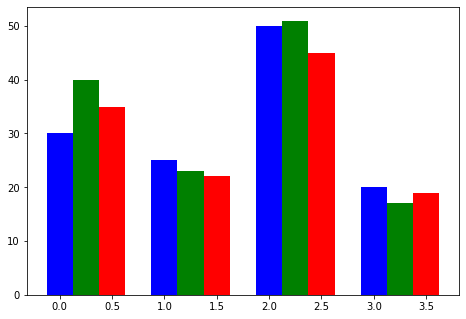

In [50]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

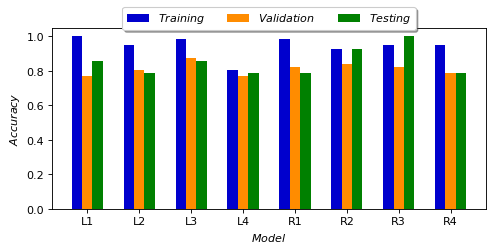

In [146]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(8)
y1 = [1, 0.946428571428571, 0.982142857142857, 0.803571428571428,
      0.982142857142857,0.928571429, 0.946428571428571, 0.946428571428571]
y2 = [0.767857143,0.803571429,0.875,0.767857143,
      0.821428571,0.839285714,0.821428571,0.785714286]
y3 = [0.857142857,0.785714286,0.857142857,0.785714286,
      0.785714286,0.928571429,1,0.785714286]
width = 0.2
plt.figure(figsize=(7,3), dpi=80)
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='mediumblue')
plt.bar(x, y2, width, color='darkorange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['L1','L2','L3','L4','R1','R2','R3','R4'])
plt.xlabel("$\it{Model}$")
plt.ylabel("$\it{Accuracy}$")
plt.legend([r"$\it{Training}$", "$\it{Validation}$", "$\it{Testing}$"],loc='center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

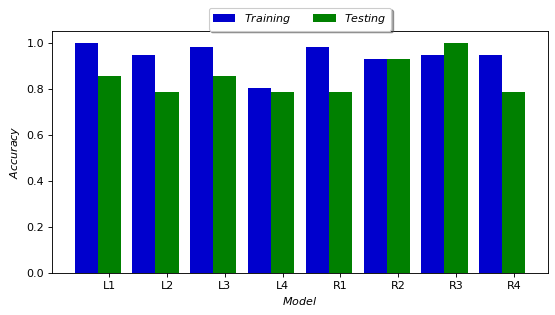

In [8]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(8)
y1 = [1, 0.946428571428571, 0.982142857142857, 0.803571428571428,
0.982142857142857,0.928571429, 0.946428571428571, 0.946428571428571]

y2 = [0.767857143,0.803571429,0.875,0.767857143,
      0.821428571,0.839285714,0.821428571,0.785714286]

y3 = [0.857142857,0.785714286,0.857142857,0.785714286,
      0.785714286,0.928571429,1,0.785714286]
width = 0.4
plt.figure(figsize=(8,4), dpi=80)
# plot data in grouped manner of bar type
plt.bar(x-0.4, y1, width, color='mediumblue')
plt.bar(x, y3, width, color='green')
plt.xticks(x, ['L1','L2','L3','L4','R1','R2','R3','R4'])
plt.xlabel("$\it{Model}$")
plt.ylabel("$\it{Accuracy}$")
plt.legend([r"$\it{Training}$", "$\it{Testing}$"],loc='center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## 3 window

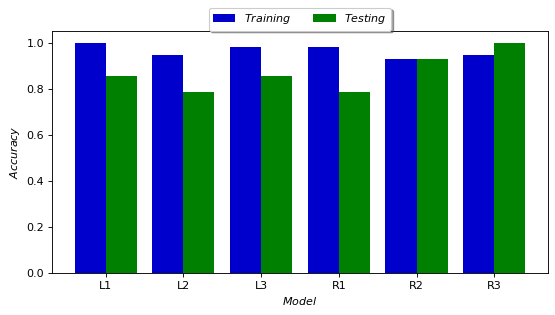

In [10]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(6)
y1 = [1, 0.946428571428571, 0.982142857142857, 
0.982142857142857,0.928571429, 0.946428571428571]

y2 = [0.767857143,0.803571429,0.875,
      0.821428571,0.839285714,0.821428571]

y3 = [0.857142857,0.785714286,0.857142857,
      0.785714286,0.928571429,1]
width = 0.4
plt.figure(figsize=(8,4), dpi=80)
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='mediumblue')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['L1','L2','L3','R1','R2','R3'])
plt.xlabel("$\it{Model}$")
plt.ylabel("$\it{Accuracy}$")
plt.legend([r"$\it{Training}$", "$\it{Testing}$"],loc='center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Linear

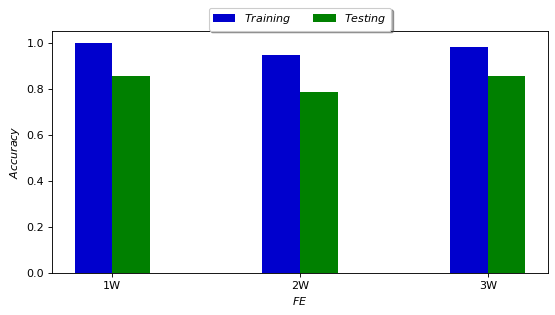

In [19]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(3)
y1 = [1, 0.946428571428571, 0.982142857142857, ]

y2 = [0.767857143,0.803571429,0.875,]

y3 = [0.857142857,0.785714286,0.857142857]
width = 0.2
plt.figure(figsize=(8,4), dpi=80)
# plot data in grouped manner of bar type
plt.bar(x-0.1, y1, width, color='mediumblue')
plt.bar(x+0.1, y3, width, color='green')
plt.xticks(x, ['1W','2W','3W'])
plt.xlabel("$\it{FE}$")
plt.ylabel("$\it{Accuracy}$")
plt.legend([r"$\it{Training}$", "$\it{Testing}$"],loc='center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## RBF

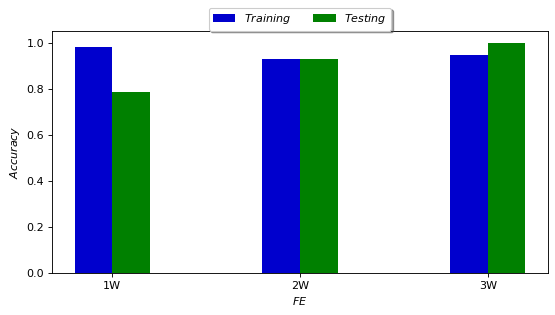

In [18]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(3)
y1 = [ 
0.982142857142857,0.928571429, 0.946428571428571]

y2 = [
      0.821428571,0.839285714,0.821428571]

y3 = [
      0.785714286,0.928571429,1]
width = 0.2
plt.figure(figsize=(8,4), dpi=80)
# plot data in grouped manner of bar type
plt.bar(x-0.1, y1, width, color='mediumblue')
plt.bar(x+0.1, y3, width, color='green')
plt.xticks(x, ['1W','2W','3W'])
plt.xlabel("$\it{FE}$")
plt.ylabel("$\it{Accuracy}$")
plt.legend([r"$\it{Training}$", "$\it{Testing}$"],loc='center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
  
# create data
df = pd.DataFrame([['1W', ], ['B', 20, 25, 15, 25], ['C', 12, 15, 19, 6],
                   ['D', 10, 29, 13, 19]],
                  columns=['L1','L2','L3','L4','R1','R2','R3','R4'])
# view data
print(df)
  
# plot grouped bar chart
df.plot(x='Team',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

ValueError: 8 columns passed, passed data had 5 columns

In [10]:
from luwiji.svm import demo
demo.C(1)

interactive(children=(FloatLogSlider(value=10.0, description='C', max=1.0, min=-2.0, step=0.25), Output()), _d…

In [32]:
df = pd.read_csv("A_35.csv")
df

,time(s),F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Temp,Humid
0,0.0,2015.250,790.500,1482.750,1711.375,1825.500,2487.625,258.125,1352.000,2022.625,1560.750,37.67,41.27
1,0.1,2015.250,790.375,1482.875,1711.375,1825.500,2487.750,258.125,1352.125,2022.750,1560.875,37.69,41.28
2,0.2,2015.250,790.375,1482.875,1711.500,1825.625,2487.750,258.125,1352.125,2022.875,1561.000,37.71,41.31
3,0.3,2015.250,790.375,1482.875,1711.625,1825.750,2487.875,258.125,1352.250,2022.875,1561.125,37.71,41.30
4,0.4,2015.250,790.375,1482.875,1711.625,1825.625,2487.875,258.125,1352.250,2023.000,1561.250,37.71,41.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,289.6,2023.875,791.250,1484.750,1712.250,1827.500,2490.250,259.250,1363.000,2028.875,1570.875,37.89,41.33
2897,289.7,2023.875,791.250,1484.750,1712.250,1827.500,2490.250,259.625,1363.000,2028.875,1570.750,37.86,41.29
2898,289.8,2023.875,791.375,1484.625,1712.250,1827.500,2490.250,259.250,1363.000,2028.750,1570.750,37.88,41.30
2899,289.9,2023.875,791.375,1484.750,1712.250,1827.625,2490.250,259.500,1362.875,2028.750,1570.750,37.88,41.32


In [37]:
df.rename(columns={"time(s)":"time"}, inplace=True)

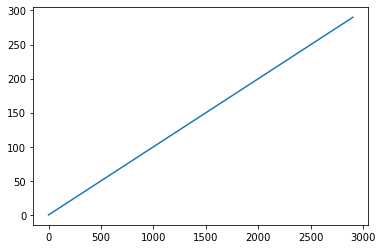

In [47]:
df.time.plot()

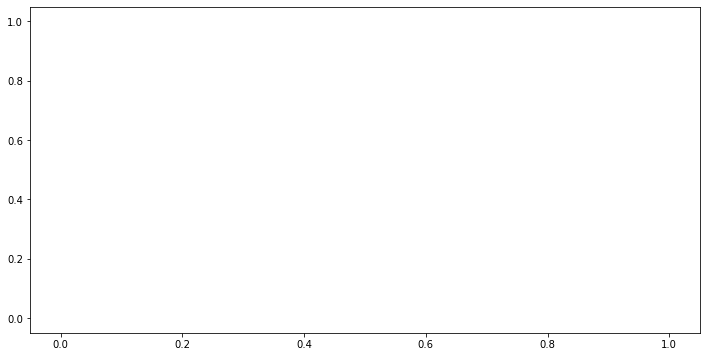

In [64]:
fig, ax = plt.subplots(figsize=(12, 6))
x = df.time
y = df.drop(columns='time')

ax.plot()

plt.show()


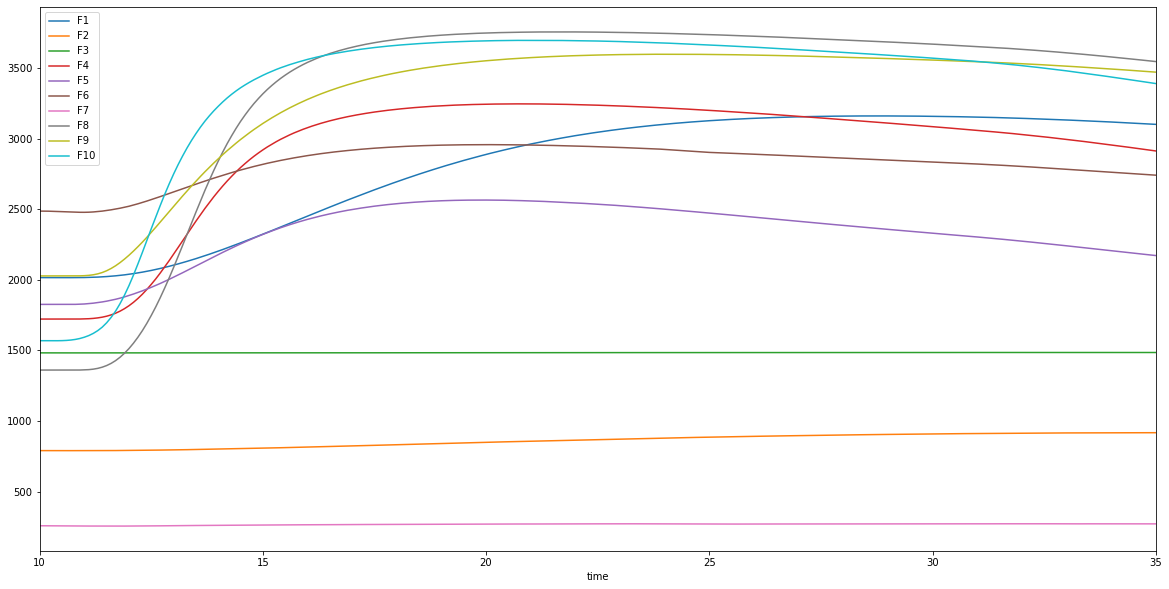

In [75]:
x = df.time
y = df.drop(columns='time')

df.plot(figsize = (20,10),x='time', y = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10'], xlim = (10,35))